In [27]:
import numpy as np
import sympy as sp
import math
from matplotlib import pyplot
%matplotlib inline

In [28]:
nx = 81
L = 4
u_max = 1
rho_max = 10
nt = 30
rho_L = 5
xL = 2
dx = L / (nx-1)
sigma = 1
dt = sigma*dx/u_max

x = np.linspace(0, L, num=nx)
def ic(x, xL, rho_L):
    rho0=np.zeros(nx)
    mask = np.where((x >= 0) & (x<xL))
    rho0[mask] = rho_L * x[mask] / xL
    
    return rho0

Text(0.5, 1.0, 'Initial Car Density for Part A')

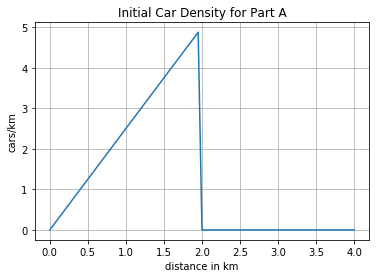

In [29]:
rho0 = ic(x=x, xL=xL, rho_L=rho_L)
pyplot.figure()
pyplot.plot(x, rho0)
pyplot.xlabel('distance in km')
pyplot.ylabel('cars/km')
pyplot.grid()
pyplot.title('Initial Car Density for Part A')

In [30]:
def velocity(rho, u_max, rho_max):
    u = u_max * (1 - rho / rho_max)
    return u

In [31]:
def flux(rho, u_max, rho_max):
    F = rho * velocity(rho, u_max, rho_max)
    return F

In [32]:
def ftbs(rho_max, u_max, rho0, dt, dx, nt):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, u_max, rho_max)
        
        rho[1:] = rho[1:] - dt/dx * (F[1:] - F[:-1])
            
        rho_hist.append(rho.copy())
    
    return rho_hist

In [33]:
rho_hist = ftbs(rho_max, u_max, rho0, dt, dx, nt)

In [34]:
np.shape(rho_hist[-1])

(81,)

In [35]:
def plot(n, x, rho_hist):
    pyplot.figure()
    pyplot.title('Time step: {}'.format(n))
    pyplot.xlabel('Distance on Road')
    pyplot.ylabel('Traffic Density')
    pyplot.plot(x, rho_hist[n])
    pyplot.xlim(x[0], x[-1])
    pyplot.ylim(-0.5, 11)
    pyplot.grid()
    pyplot.show()

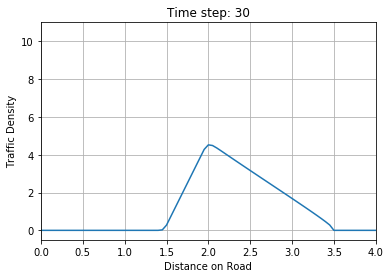

In [36]:
plot(nt, x, rho_hist)

In [37]:
import ipywidgets

In [38]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='Time Step')
    w = ipywidgets.interactive(plot, n=nt_slider, x=ipywidgets.fixed(x), rho_hist=ipywidgets.fixed(rho_hist))
    return w

In [39]:
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time Step', max=30), Output()), _dom_classes=('widget-in…